# Расчет КИХ-фильтра методом окна

### Метод окна
Результатом расчета фильтра с конечной импульсной характеристикой (КИХ) является его импульсная характеристика $h(n)$. Зная импульсную характеристику легко реализовать КИХ-фильтр с использованием операции свертки сигнала воздействия $x(n)$ с импульсной характеристикой $h(n)$.
Метод окна является самым простым методом расчета фильтра. 

Идея метода окна заключается в следующем:
1. Необходимо задать желаемую форму АЧХ фильтра $H(k)$;
2. Вычислить импульсную характеристику фильтра с применением обратного преобразования Фурье

$h(n)=\frac{1}{N}\sum\limits_{k=0}^{N-1}H(k)e^{-j\frac{2\pi}{N}kn}$,    $n=0,1, ... ,(N-1)$

где

$N$ - размер преобразования Фурье при вычислениии импульсной характеристики

$h(n),n=0,1, ... ,(N-1)$ - период импульсной характеристики

$H(k),k=0,1, ... ,(N-1)$ - период частотной характеристики

3. Величина $N$ при переходе из частотной области во временную имеет большое значение (512, 1024, 2048 или даже больше). Получаемая, при этом, импульсная характеристика также имеет болшую длину. Для реализации фильтра необходимо реализовать свертку воздействия и импульсной характиристики. В этом случае при больших значениях $N$ объем вычислений при реализации свертки может превысить допустимые значения и быстродействия вычислителя может не хватить. Так как, импульсная характеристика быстро затухает, то для повышения быстродействия фильтра принято ограничивать длину импульсной характеристики путем умножения ее на функцию окна $w(n)$. Усеченную импульсную характеристику $h_{cut}(n)$ и используют для свертки. Использование усеченной импульсной характеристики существенно повышает быстродействие фильтра. Однако, в АЧХ появляются ошибки.

Виды ошибок в АЧХ фильтра после усечения импульсной характеристики:
1. В АЧХ появляются пульсации на всех частотах. Амплитуда пульсаций напрямую зависит от амплитуды боковых лепестков спектра функции окна. Для снижения пульсаций выбирают функцию окна со спадающими краями (Ханна, Хэмминга, Блэкмана и др.). Прямоугольное окно никогда не используют для расчета фильтра методом окна, т.к. дает наибольшую амплитуду пульсаций.
2. В АЧХ появляется переходная полоса между полосами пропускания и заграждения.

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft, ifft

#plt.rc('font',**{'family':'verdana'})

In [3]:
# x - воздействие
# y - реакция
# t - метки времени
def signal_plot(x,y,t):
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.step(t,x) 
    ax.step(t,y,'r') 
    ax.set_xlabel('Время t, с')
    ax.set_ylabel('f(t)')
    ax.set_title('Воздействие и реакция')

#### 1. Зададим основные параметры фильтра и сигнала

In [4]:
fd=10000     #Частота опроса, Гц
dt = 1.0/fd  #Период опроса, с

N=1024     #Размер БПФ для расчета АЧХ
df=fd/N    #Точность представления частотной области
fs=1500    #Частота среза фильтра
ns=int(fs/df)   #Номер отсчета АЧХ, который соответствует частоте среза

#### 2. Зададим форму АЧХ

In [5]:
f=np.arange(0.0, fd, df) #Шкала (ось) частот 
H=np.zeros(len(f))       #Заготовка для АЧХ

#Задаем форму АЧХ
H[0:ns]=1
H[N-ns:N]=1  #Зеркальное отражение АЧХ

Отобразим графики АЧХ

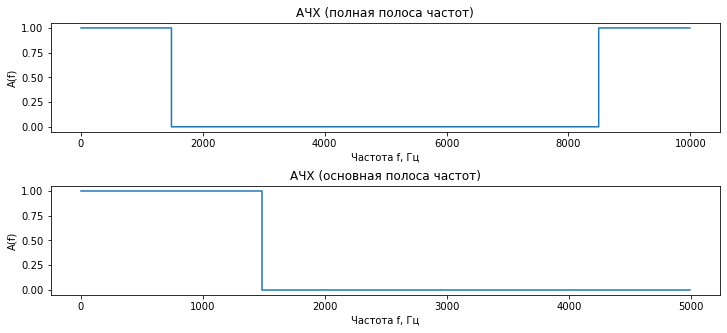

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(12, 5))
ax[0].step(f,H) 
ax[0].set_xlabel('Частота f, Гц')
ax[0].set_ylabel('A(f)')
ax[0].set_title('АЧХ (полная полоса частот)')

ax[1].step(f[0:int(len(f)/2)],H[0:int(len(f)/2)]) 
ax[1].set_xlabel('Частота f, Гц')
ax[1].set_ylabel('A(f)')
ax[1].set_title('АЧХ (основная полоса частот)')

plt.subplots_adjust(wspace=0.12, hspace=0.5) 

#### 3. Вычисление импульсной характеристики

In [7]:
h=ifft(H)  #Обратное БПФ для вычисления ИХ
h=np.real(h) #Сохранить только действительную часть ИХ (мнимая равна нулю)

#Сдвиг импульсной характеристики
hShift=np.zeros(len(f))
hShift[0:int(N/2)]=h[int(N/2):N]
hShift[int(N/2):N]=h[0:int(N/2)]

Отобразим графики импульсных характеристик

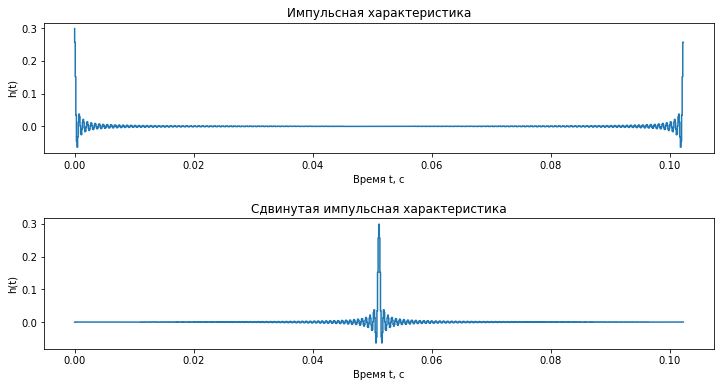

In [8]:
fig, ax = plt.subplots(2,1,figsize=(12, 6))
ax[0].step(np.arange(0.0, N/fd, dt),h) 
ax[0].set_xlabel('Время t, с')
ax[0].set_ylabel('h(t)')
ax[0].set_title('Импульсная характеристика')

ax[1].step(np.arange(0.0, N/fd, dt),hShift) 
ax[1].set_xlabel('Время t, с')
ax[1].set_ylabel('h(t)')
ax[1].set_title('Сдвинутая импульсная характеристика')

plt.subplots_adjust(wspace=0.12, hspace=0.5) 

**Важно!** Обратите внимание на скорость затухания импульсной характеристики

#### 4. Реализация фильтрации без усечения импульсной характеристики (Пример)

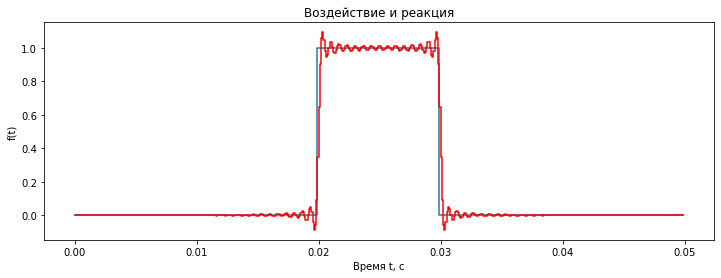

In [9]:
#Задаем параметры воздействия
d=0.05         #Длительность сигнала, с
d_imp=0.01   #Длительность импульса, с
n_imp=int(d_imp*fd) #Длительность импульса, отсчеты
begin_imp=round(fd*d/2-fd*d_imp/2) #Начало импульса, отс.
end_imp=begin_imp+n_imp            #Конец импульса, отс.
t = np.arange(0.0, d, dt) #Массив меток времени, с
x = np.zeros(len(t)) # Инициализация сигнала нулями 
x[int(begin_imp):int(end_imp)] = 1.0   # Создание импульса

#Свертка
y = signal.convolve(x,hShift,mode='same')
signal_plot(x,y,t)


**Важно!** Обратите внимание на пульсации на краях импульса

Вычислим спектры воздействия и реакции

(-65.0, 45.0)

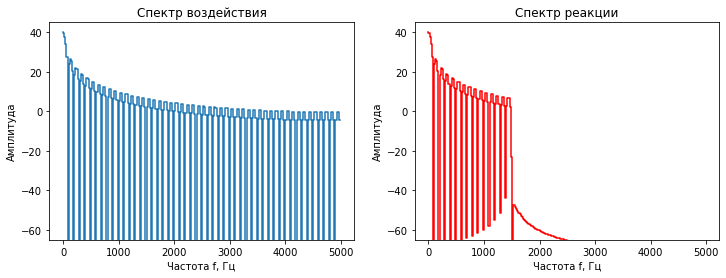

In [10]:
X=20*np.log10(np.abs(fft(x))+0.00001)
Y=20*np.log10(np.abs(fft(y))+0.00001)

#Метки частот
f=np.arange(0.0,fd,fd/len(X))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].step(f[0:int(len(f)/2)],X[0:int(len(f)/2)]) 
ax[0].set_xlabel('Частота f, Гц')
ax[0].set_ylabel('Амплитуда')
ax[0].set_title('Спектр воздействия')
ax[0].set_ylim([-65,45])
ax[1].step(f[0:int(len(f)/2)],Y[0:int(len(f)/2)],'r') 
ax[1].set_xlabel('Частота f, Гц')
ax[1].set_ylabel('Амплитуда')
ax[1].set_title('Спектр реакции')
ax[1].set_ylim([-65,45])

**Важно!** Обратите внимание на поведение спектра реакции в полосе пропускания, полосе заграждения и в районе частоты среза

#### 5. Усечение импульсной характеристики временным окном

In [11]:
M=31    #Длина усеченной импульсной характеристики

#Умножаем импульсную характеристику на окна прямоугольное, Хэмминга, Ханна, Блэкмана
#Для фильтрации выбрать одно из окон
h_rect=hShift[int(len(hShift)/2-M/2):int(len(hShift)/2+M/2)]
h_hanning=hShift[int(len(hShift)/2-M/2):int(len(hShift)/2+M/2)]*np.hanning(M)
h_hamming=hShift[int(len(hShift)/2-M/2):int(len(hShift)/2+M/2)]*np.hamming(M)
h_blackman=hShift[int(len(hShift)/2-M/2):int(len(hShift)/2+M/2)]*np.blackman(M)

Вычислим АЧХ фильтров с усеченными импульсными характеристиками

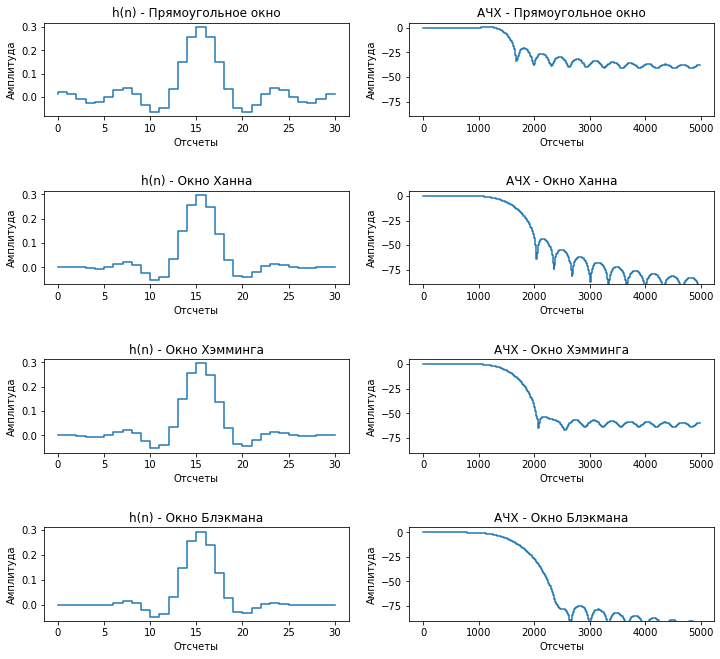

In [12]:
H_rect=20*np.log10(np.abs(fft(h_rect, n=1024))+0.00001)
H_hanning=20*np.log10(np.abs(fft(h_hanning, n=1024))+0.00001)
H_hamming=20*np.log10(np.abs(fft(h_hamming, n=1024))+0.00001)
H_blackman=20*np.log10(np.abs(fft(h_blackman, n=1024))+0.00001)

#Отобразим усеченных импульсные характеристики и их спектры
fig, ax = plt.subplots(4, 2, figsize=(12, 11))
ax[0,0].step(range(0,M),h_rect)
ax[0,0].set_xlabel('Отсчеты')
ax[0,0].set_ylabel('Амплитуда')
ax[0,0].set_title('h(n) - Прямоугольное окно')

ax[0,1].step(np.arange(0,fd,fd/1024)[0:512],H_rect[0:512])
ax[0,1].set_xlabel('Отсчеты')
ax[0,1].set_ylabel('Амплитуда')
ax[0,1].set_title('АЧХ - Прямоугольное окно')
ax[0,1].set_ylim(-90,5)

ax[1,0].step(range(0,M),h_hanning)
ax[1,0].set_xlabel('Отсчеты')
ax[1,0].set_ylabel('Амплитуда')
ax[1,0].set_title('h(n) - Окно Ханна')

ax[1,1].step(np.arange(0,fd,fd/1024)[0:512],H_hanning[0:512])
ax[1,1].set_xlabel('Отсчеты')
ax[1,1].set_ylabel('Амплитуда')
ax[1,1].set_title('АЧХ - Окно Ханна')
ax[1,1].set_ylim(-90,5)

ax[2,0].step(range(0,M),h_hamming)
ax[2,0].set_xlabel('Отсчеты')
ax[2,0].set_ylabel('Амплитуда')
ax[2,0].set_title('h(n) - Окно Хэмминга')

ax[2,1].step(np.arange(0,fd,fd/1024)[0:512],H_hamming[0:512])
ax[2,1].set_xlabel('Отсчеты')
ax[2,1].set_ylabel('Амплитуда')
ax[2,1].set_title('АЧХ - Окно Хэмминга')
ax[2,1].set_ylim(-90,5)

ax[3,0].step(range(0,M),h_blackman)
ax[3,0].set_xlabel('Отсчеты')
ax[3,0].set_ylabel('Амплитуда')
ax[3,0].set_title('h(n) - Окно Блэкмана')

ax[3,1].step(np.arange(0,fd,fd/1024)[0:512],H_blackman[0:512])
ax[3,1].set_xlabel('Отсчеты')
ax[3,1].set_ylabel('Амплитуда')
ax[3,1].set_title('АЧХ - Окно Блэкмана')
ax[3,1].set_ylim(-90,5)

plt.subplots_adjust(wspace=0.2, hspace=0.8) 

**Важно!** Обратите внимание
1. Появились переходные полосы в районе частоты среза.
2. Переходная полоса шире для окон с затухающими краями.
3. Окна с затухающими краями позволяют получить бОльшие значения коэффициента подавления в полосе заграждения по сравнению с прямоугольным окном.

#### 6. Реализация фильтрации с использованием усеченных импульсных характеристик

In [13]:
#Реализация свертки
#Для фильтрации выбрать по заданию один вариант
y_rect = signal.convolve(x,h_rect,mode='same')
y_hanning = signal.convolve(x,h_hanning,mode='same')
y_hamming = signal.convolve(x,h_hamming,mode='same')
y_blackman = signal.convolve(x,h_blackman,mode='same')

Вычислим спектр реакции

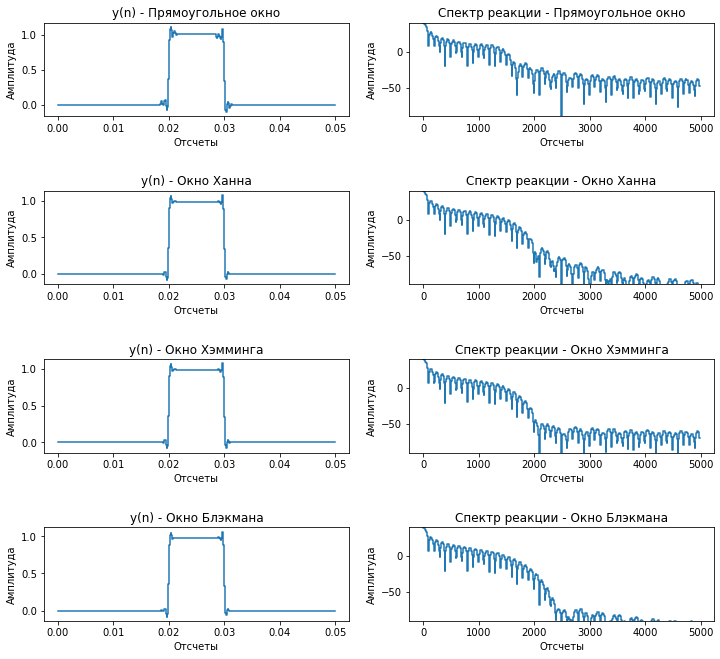

In [14]:
#Вычисление спектра реакции
Y_rect=20*np.log10(np.abs(fft(y_rect, n=1024))+0.00001)
Y_hanning=20*np.log10(np.abs(fft(y_hanning, n=1024))+0.00001)
Y_hamming=20*np.log10(np.abs(fft(y_hamming, n=1024))+0.00001)
Y_blackman=20*np.log10(np.abs(fft(y_blackman, n=1024))+0.00001)

fig, ax = plt.subplots(4, 2, figsize=(12, 11))
ax[0,0].step(t,y_rect)
ax[0,0].set_xlabel('Отсчеты')
ax[0,0].set_ylabel('Амплитуда')
ax[0,0].set_title('y(n) - Прямоугольное окно')

ax[0,1].step(np.arange(0,fd,fd/1024)[0:512],Y_rect[0:512])
ax[0,1].set_xlabel('Отсчеты')
ax[0,1].set_ylabel('Амплитуда')
ax[0,1].set_title('Спектр реакции - Прямоугольное окно')
ax[0,1].set_ylim(-90,40)

ax[1,0].step(t,y_hanning)
ax[1,0].set_xlabel('Отсчеты')
ax[1,0].set_ylabel('Амплитуда')
ax[1,0].set_title('y(n) - Окно Ханна')

ax[1,1].step(np.arange(0,fd,fd/1024)[0:512],Y_hanning[0:512])
ax[1,1].set_xlabel('Отсчеты')
ax[1,1].set_ylabel('Амплитуда')
ax[1,1].set_title('Спектр реакции - Окно Ханна')
ax[1,1].set_ylim(-90,40)

ax[2,0].step(t,y_hamming)
ax[2,0].set_xlabel('Отсчеты')
ax[2,0].set_ylabel('Амплитуда')
ax[2,0].set_title('y(n) - Окно Хэмминга')

ax[2,1].step(np.arange(0,fd,fd/1024)[0:512],Y_hamming[0:512])
ax[2,1].set_xlabel('Отсчеты')
ax[2,1].set_ylabel('Амплитуда')
ax[2,1].set_title('Спектр реакции - Окно Хэмминга')
ax[2,1].set_ylim(-90,40)

ax[3,0].step(t,y_blackman)
ax[3,0].set_xlabel('Отсчеты')
ax[3,0].set_ylabel('Амплитуда')
ax[3,0].set_title('y(n) - Окно Блэкмана')

ax[3,1].step(np.arange(0,fd,fd/1024)[0:512],Y_blackman[0:512])
ax[3,1].set_xlabel('Отсчеты')
ax[3,1].set_ylabel('Амплитуда')
ax[3,1].set_title('Спектр реакции - Окно Блэкмана')
ax[3,1].set_ylim(-90,40)

plt.subplots_adjust(wspace=0.2, hspace=0.8)

### Задания для выполнения
1. Реализуйте фильтры нижних частот с частотами среза $f_с=1000 Гц$ и $f_с=100 Гц$. В качестве испытательного воздействия используйте функцию единичного скачка. Длительность испытательного воздействия 0.1с. Скачек соответствует моменту времени 0.05с. В качестве оконной функции для усечения импульсной характеристики используйте прямоугольное окно. Длина окна $M=257$. Обратите внимание на сглаживание фронта сигнала при разных частотах среза ФНЧ. Постарайтесь сделать вывод об этом.

2. Реализуйте полосовые фильтры с частотами среза $f_н=1000 Гц$ и $f_в=2500 Гц$. В качестве оконной функции для усечения импульсной характеристики используйте прямоугольное окно и окно Хэмминга. Длина окна $M=31$. В качестве испытательного воздействия используйте единичный импульс. Сделайте вывод о том, как влияет форма окна на АЧХ фильтра при усечении импульсной характеристики. Что получим на выходе фильтра при использовании единичного импульса в качестве испытательного воздействия?

3. Реализуйте фильтры верхних частот с частой среза $f_с=2500 Гц$. В качестве оконной функции для усечения импульсной характеристики используйте окно Блэкмана. Длину окна возьмите равной $M=21$ и $M=41$. В качестве испытательного воздействия используйте единичный импульс. Сделайте вывод о том, как влияет длина окна на АЧХ фильтра при усечении импульсной характеристики.